#                    Case study on Pre-processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [4]:
df=pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [5]:
df=df.set_index('PassengerId')

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
df.shape

(891, 11)

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

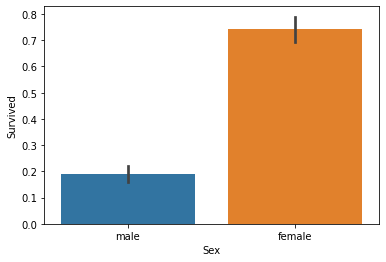

In [9]:
sns.barplot('Sex','Survived',data=df)

Observations:

    1. There are 891 samples in the given dataset 
    2. The number of female survivers is larger than number of male survivers. 
    3. There are 177 missing values in age, 2 in Embarked and  687 in cabin.

# 4. Fill in all the missing values present in all the columns in the dataset

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
# THE NUMBER OF MISSING VALUES IN CABIN IS 687 WHICH IS VERY LARGE.SO WE CAN DROP THE CABIN COLUMN.
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [14]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


# 5. Check and handle outliers in at least 3 columns in the dataset

In [18]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

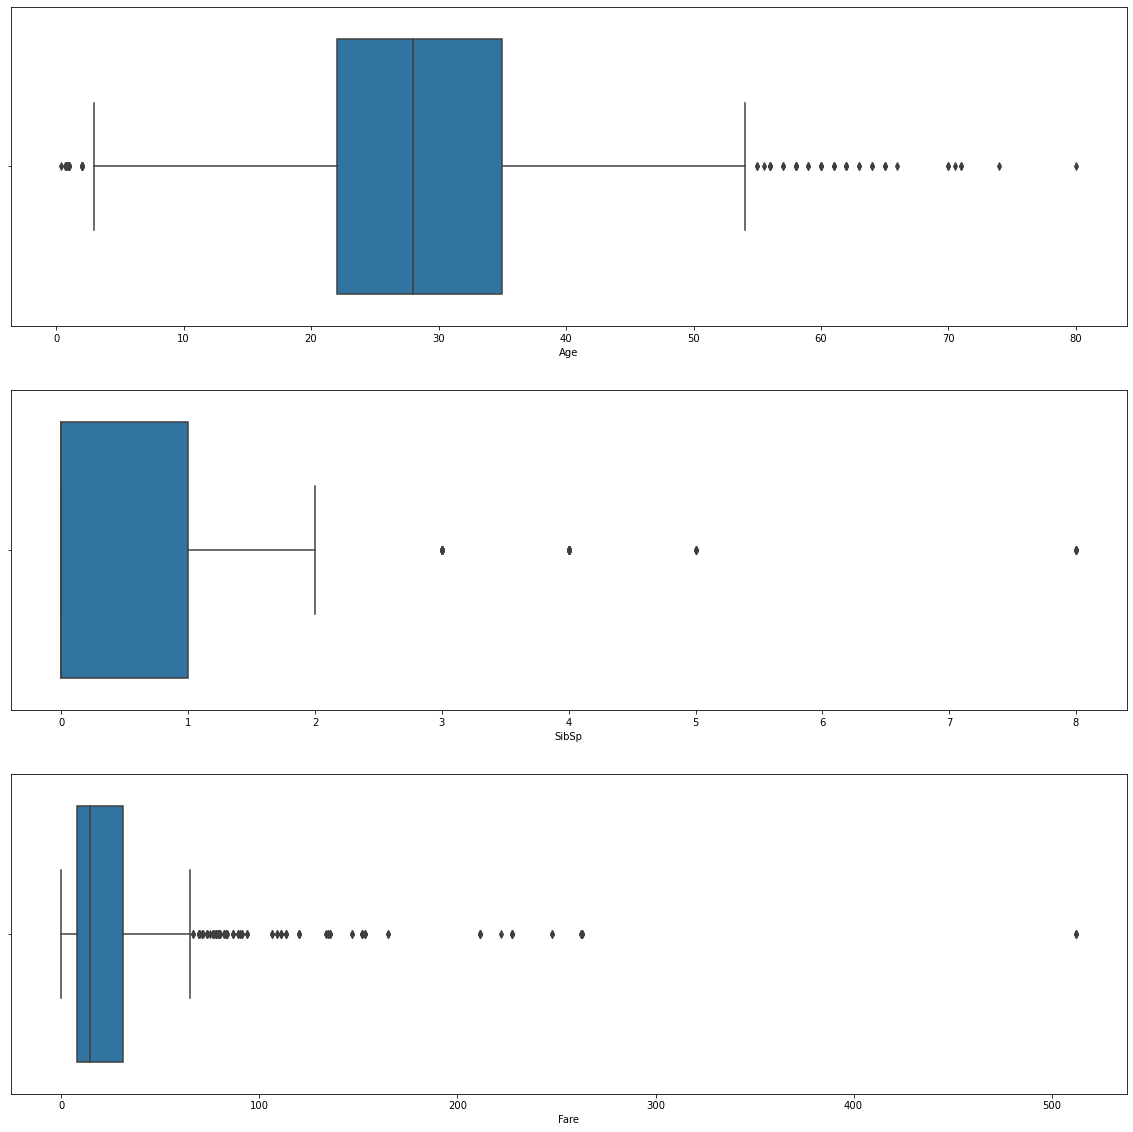

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(df['Age'])
plt.subplot(3,1,2)
sns.boxplot(df['SibSp'])
plt.subplot(3,1,3)
sns.boxplot(df['Fare'])

OUTLIER HANDLING IN AGE

In [20]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print("UPPER LIMIT=",upp_limit)
print("LOWER LIMIT=",low_limit)
outlier=[]
for i in df['Age']:
    if ((i>upp_limit)|(i<low_limit)):
        outlier.append(i)
                      
print("OUTLIER= ",outlier)
    

Q1= 22.0
Q2= 28.0
Q3= 35.0
IQR= 13.0
UPPER LIMIT= 54.5
LOWER LIMIT= 2.5
OUTLIER=  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [22]:
indi=df[(df['Age']>upp_limit)|(df['Age']<low_limit)].index
df.loc[indi].index


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [23]:
df.drop(indi,inplace=True)

In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


HANDLING OUTLIERS IN SibSp

In [25]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print("UPPER LIMIT=",upp_limit)
print("LOWER LIMIT=",low_limit)
outlier=[]
for i in df['SibSp']:
    if ((i>upp_limit)|(i<low_limit)):
        outlier.append(i)
                      
print("OUTLIER= ",outlier)

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
UPPER LIMIT= 2.5
LOWER LIMIT= -1.5
OUTLIER=  [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [26]:
ind=df[(df['SibSp']>upp_limit)|(df['SibSp']<low_limit)].index
df.loc[ind].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [27]:
df.drop(ind,inplace=True)

In [28]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


HANDLING OUTLIERS IN Fare

In [29]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
upp_limit=Q3+1.5*IQR
low_limit=Q1-1.5*IQR
print("UPPER LIMIT=",upp_limit)
print("LOWER LIMIT=",low_limit)
outlier=[]
for i in df['Fare']:
    if ((i>upp_limit)|(i<low_limit)):
        outlier.append(i)
                      
print("OUTLIER= ",outlier)

Q1= 7.8958
Q2= 13.0
Q3= 27.75
IQR= 19.8542
UPPER LIMIT= 57.5313
LOWER LIMIT= -21.885499999999997
OUTLIER=  [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [30]:
ind=df[(df['Fare']>upp_limit)|(df['Fare']<low_limit)].index
df.loc[ind].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [31]:
df.drop(ind,inplace=True)

In [32]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

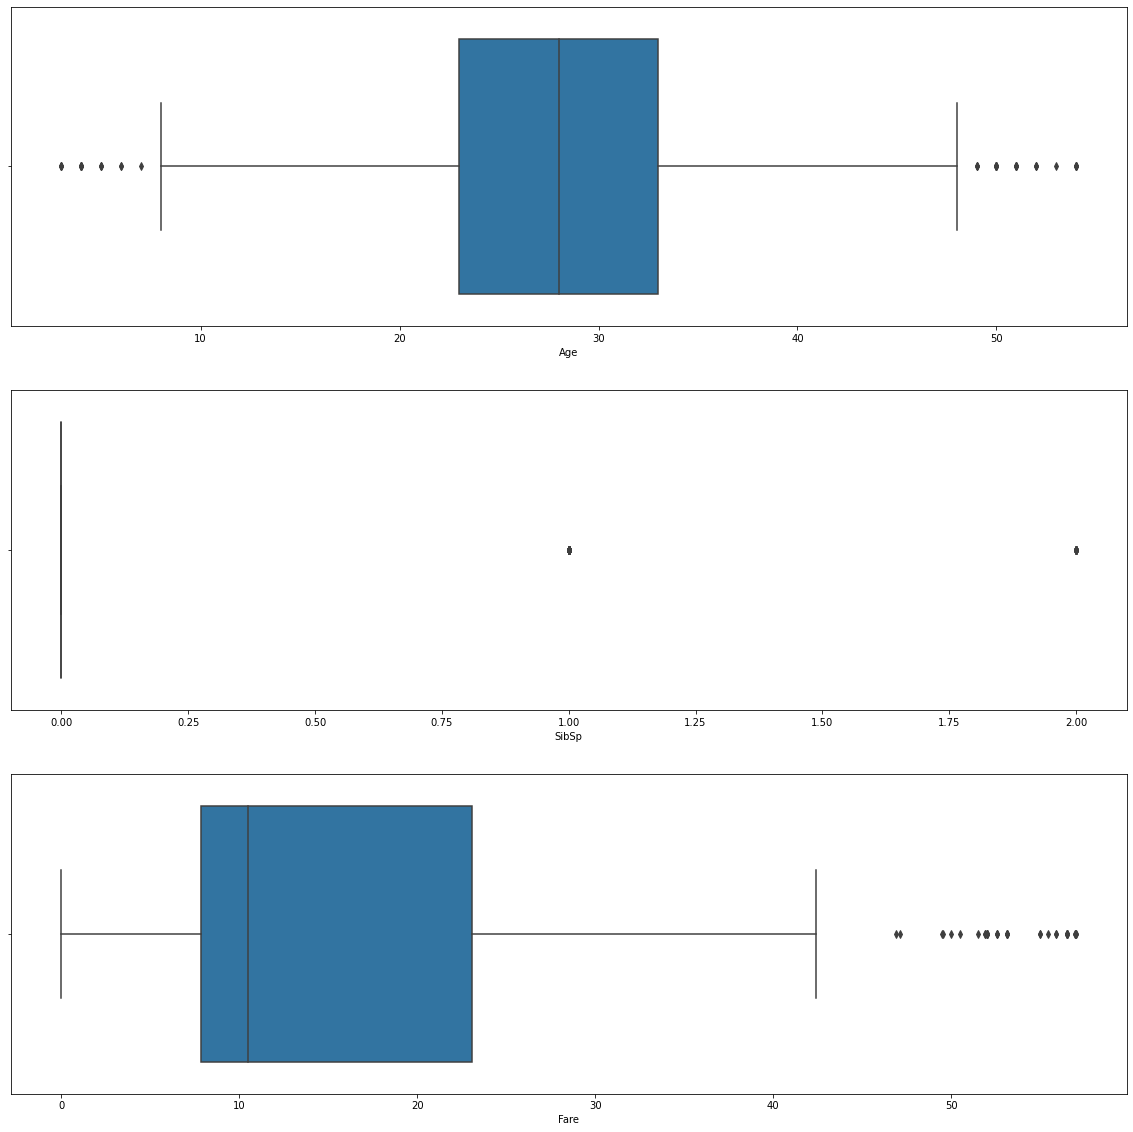

In [60]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(df['Age'])
plt.subplot(3,1,2)
sns.boxplot(df['SibSp'])
plt.subplot(3,1,3)
sns.boxplot(df['Fare'])

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [46]:
x=df.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)
x

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [47]:
type(x)

pandas.core.frame.DataFrame

In [48]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,28.612573,0.271930,0.267544,16.317275
std,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [52]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x=minmax.fit_transform(x)

In [53]:
x=pd.DataFrame(x)

In [55]:
x.columns=['Pclass','Age','SibSp','Parch','Fare']

In [57]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000
